# **Setup**

* https://www.kaggle.com/datasets/kanchana1990/social-media-sentiments-putin-and-carlson-interview/data

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:
Folder_Input = 'Input Data'

# **Data Import**

## **Download Data**

In [19]:
os.chdir(Folder_Input)
# !kaggle datasets download -d kanchana1990/social-media-sentiments-putin-and-carlson-interview
os.chdir('..')

## **Read Data**

In [20]:
df = pd.read_csv(f'{Folder_Input}/putin_tucker.csv')

print(df.shape)
print(df.columns)
df.head()

(100000, 5)
Index(['Comment', 'Anonymized Author', 'Published At', 'Likes', 'Reply Count'], dtype='object')


,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Watch my immediate reaction to the interview h...,533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...,2024-02-08T23:44:11Z,25601,750
1,The Russian to English translator did an EXCEL...,e00ef7ce570d1e6ba6e914755ffb9a0055386a3b0a6114...,2024-02-09T02:33:19Z,79514,750
2,The translation from Russian to English was ex...,c4add09939263f9b8509035f63b869662bc542641a3dc3...,2024-02-19T04:32:50Z,265,5
3,That was the longest 1 minute and 30 seconds h...,5b4d9b16bbfbc80edcb1941313fc0ee53748aea58bf3b8...,2024-02-18T06:58:59Z,1076,27
4,What's the difference between Tucker and a mob...,05ed0eddfa93d78083bcfb64186f749c6667c87da5ebc5...,2024-02-19T09:52:34Z,70,0


# **Data Validation**

In [21]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Comment            100000 non-null  object
 1   Anonymized Author  100000 non-null  object
 2   Published At       100000 non-null  object
 3   Likes              100000 non-null  int64 
 4   Reply Count        100000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [22]:
# Rename Columns
df.rename(columns={'Anonymized Author':'Author', 'Published At':'Date','Reply Count':'Replies'},inplace=True)

In [23]:
# Convert Published Time Data Type # format='%Y-%m-%d-%H:%M:%S'
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   Comment  100000 non-null  object             
 1   Author   100000 non-null  object             
 2   Date     100000 non-null  datetime64[ns, UTC]
 3   Likes    100000 non-null  int64              
 4   Replies  100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 3.8+ MB


In [24]:
# Check For Missing Values
df.isna().sum()

Comment    0
Author     0
Date       0
Likes      0
Replies    0
dtype: int64

In [25]:
# Check For Duplicate Entries
df.duplicated().sum()

0

# **Data Exploration**

In [26]:
# No. Of Unique Commentors
df['Author'].nunique()

100000

In [27]:
# Earliest & Latest Comment Time
print('First Comment: ',df['Date'].min())
print('Last Comment: ',df['Date'].max())

First Comment:  2024-02-08 23:31:16+00:00
Last Comment:  2024-02-20 07:40:31+00:00


In [28]:
df.columns

Index(['Comment', 'Author', 'Date', 'Likes', 'Replies'], dtype='object')

(array([9.9989e+04, 5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  3975.7,  7951.4, 11927.1, 15902.8, 19878.5, 23854.2,
        27829.9, 31805.6, 35781.3, 39757. , 43732.7, 47708.4, 51684.1,
        55659.8, 59635.5, 63611.2, 67586.9, 71562.6, 75538.3, 79514. ]),
 <BarContainer object of 20 artists>)

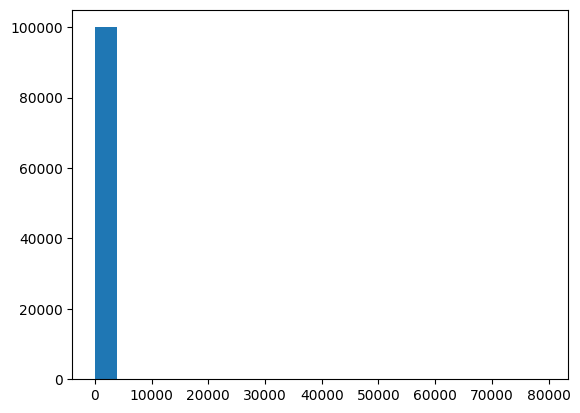

In [29]:
plt.hist(x=df['Likes'],bins=20)

In [36]:
df.select_dtypes(include='number')

,Likes,Replies
0,25601,750
1,79514,750
2,265,5
3,1076,27
4,70,0
...,...,...
99995,0,0
99996,1,0
99997,0,0
99998,3,0


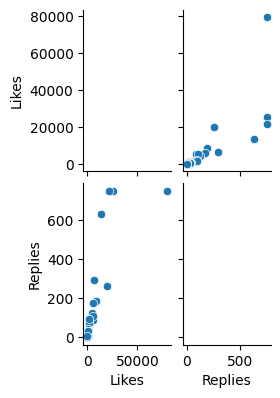

In [37]:
# Distribution Of Likes & Reply Count
sns.pairplot(df.select_dtypes(include=['number']),height=2, aspect=0.7)